In [1]:
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [2]:
path = Path('./data/raw')

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

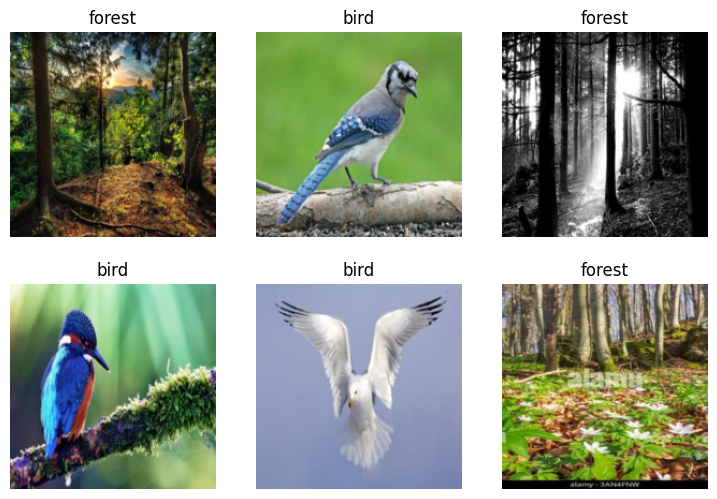

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.797045,0.177904,0.071429,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.085383,0.016152,0.014286,00:01
1,0.052252,0.003797,0.000000,00:01
2,0.038272,0.004969,0.000000,00:01
3,0.031149,0.003582,0.000000,00:01


In [10]:
print(torch.cuda.is_available())

True



🧠 Model Summary:
Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

  - Loss: 0.0036
  - Error Rate: 0.0000

🔍 Sample Predictions:


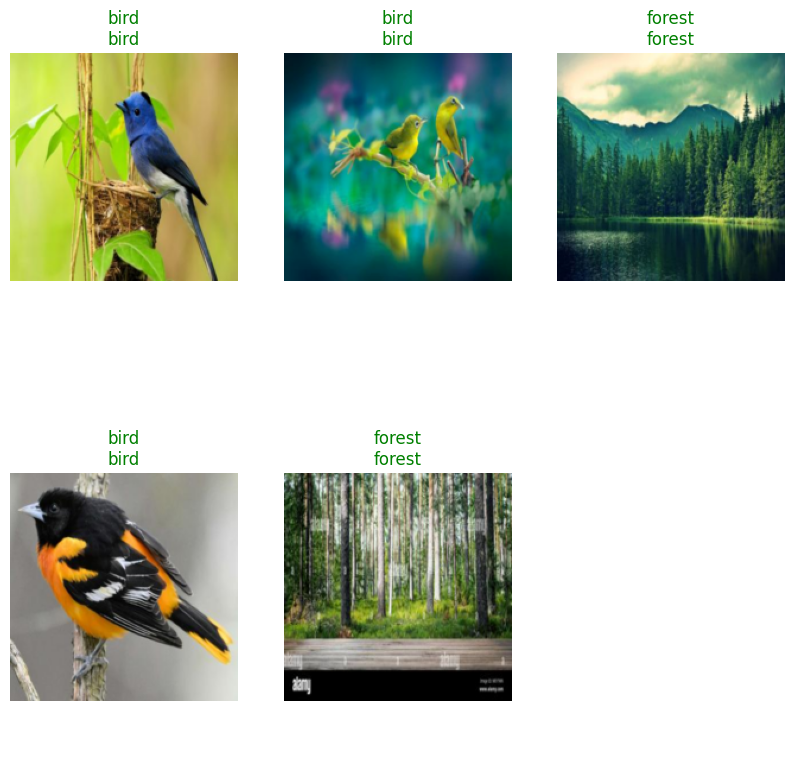

In [12]:
print("\n🧠 Model Summary:")
print(learn.model)

# Show final metrics
print("\n📈 Final Metrics on Validation Set:")
results = learn.validate()
print(f"  - Loss: {results[0]:.4f}")
print(f"  - Error Rate: {results[1]:.4f}")

# Optional: show a few predictions
print("\n🔍 Sample Predictions:")
learn.show_results(max_n=5, figsize=(10, 10))